Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

Ячейка кода ниже загружает необходимые библиотеки Python и загрузить данные датасета. 
Последний столбец из этого набора данных будет нашей целевой величина (независимо от того, закончил ли студент или не закончил). Все остальные колонки-это характеристики о каждом студенте.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import os

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

Убираем столбец не названый в описании датасета

In [3]:
stud.drop(['studytime, granular'], inplace=True, axis=1)

Приведем название колонок к одному виду

In [4]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [5]:
stud.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Добавим функции для упрощения дальнейших расчетов

In [6]:
def chgNonenuniq(row):
    '''Заменяем NaN на None.
Подсчитываем количество уникальных значений'''
    if stud[row].dtype != object:
        stud[row].hist()
        display(pd.DataFrame(stud[row].value_counts()))
        print("Уникальных значений:", stud[row].nunique())
        stud.loc[:, [row]].info()
    else:
        stud[row] = stud[row].astype(str).apply(lambda x: None if x.strip(
        ) == '' else None if x == 'nan' or x == 'NaN' else x)
        display(pd.DataFrame(stud[row].value_counts()))
        print("Уникальных значений:", stud[row].nunique())
        stud.loc[:, [row]].info()

In [7]:
def outliers(row):
    '''Находим границы выбросов и значения лежащий в межквартильном размахе    '''

    median = stud[row].median()
    perc25 = stud[row].quantile(0.25)
    perc75 = stud[row].quantile(0.75)
    IQR = perc75 - perc25
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    stud[row].loc[stud[row].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(stud[row].min()-10, stud[row].max()+10),
                                                                              label='IQR')
    plt.legend()

Рассмотрим каждый признак

Для начала приведем пустые значения предсказываемой величины к нулю, для дальнейших расчетов корреляционного анализа.
В расчет принимаем что значение 0 означает что человек не пришел на экзамен и не получил баллы.

In [8]:
stud.score = stud.score.apply(lambda x: 0 if pd.isnull(x) else x)

In [9]:
chgNonenuniq(row='school')

,school
GP,349
MS,46


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [10]:
chgNonenuniq(row='sex')

,sex
F,208
M,187


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

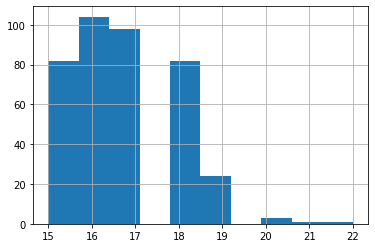

In [11]:
chgNonenuniq(row='age')
stud['age'].describe()

По графику видно, что основное количество учеников находится в возрасте от 15 до 19 лет, проверим данную категорию на наличие выбросов.

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


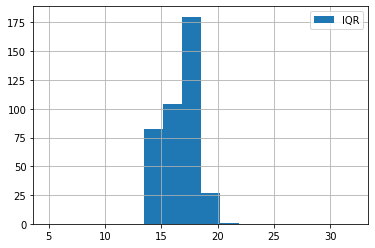

In [12]:
outliers(row='age')

Технически ученика 22 лет можно считать исключением из датесета по данной категории, но в условии сказано, что 22 входит в диапозон учащихся в возрасте от 15 до 22 лет, следовательно 22 мы не выбрасываем из данного датасета.

Пустые значение приведем к значению обозначающему отсутвие адреса, поскольку удаление строк с отсутвующими данными или замена наиболее популярным значением может сильно сказаться на точности анализа.
В дальнейшем будем придерживаться такого способа для остальных категориальных характеристик с двумя значениями.

In [13]:
stud.address = stud.address.apply(lambda x: "noadress" if pd.isnull(x) else x)

In [14]:
chgNonenuniq(row='address')

,address
U,295
R,83
noadress,17


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [15]:
stud.address.sort_values()

197           R
130           R
129           R
128           R
273           R
         ...   
348    noadress
159    noadress
254    noadress
376    noadress
96     noadress
Name: address, Length: 395, dtype: object

In [16]:
stud.famsize = stud.famsize.apply(lambda x: "nofamsize" if pd.isnull(x) else x)

In [17]:
chgNonenuniq(row='famsize')

,famsize
GT3,261
LE3,107
nofamsize,27


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [18]:
stud.pstatus = stud.pstatus.apply(lambda x: "nopstatus" if pd.isnull(x) else x)

In [19]:
chgNonenuniq(row='pstatus')

,pstatus
T,314
nopstatus,45
A,36


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

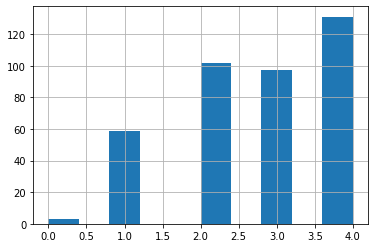

In [20]:
chgNonenuniq(row='medu')
stud['medu'].describe()

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


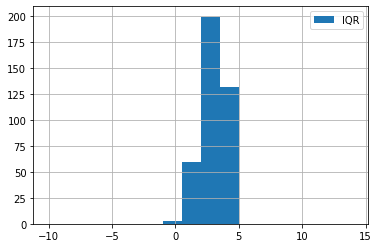

In [21]:
outliers(row='medu')

В данной категории выбросов нет, поскольку минимальные и максимальные значения внутри границ выбросов.

Заменим пустые значения на медиану.

In [22]:
stud.medu = stud.medu.apply(lambda x: stud.medu.median() if pd.isnull(x) else x)

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

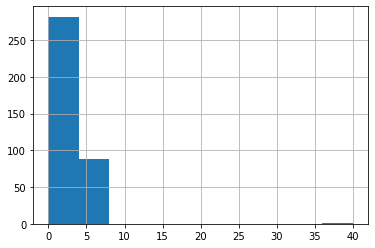

In [23]:
chgNonenuniq(row='fedu')
stud['fedu'].describe()

Заменим пустые значения на медиану.

In [24]:
stud.fedu = stud.fedu.apply(lambda x: stud.fedu.median() if pd.isnull(x) else x)

Видно что присутствует всего одно значение отличающееся от остальных. Допустим, что такое большое значение является опечаткой и на самом деле соответсвует последнему ответу.

In [25]:
stud.loc[(stud['fedu'] == stud.fedu.max()),'fedu'] = 4
stud.fedu.head(12)

0     4.0
1     1.0
2     1.0
3     2.0
4     3.0
5     3.0
6     2.0
7     4.0
8     2.0
9     4.0
10    4.0
11    4.0
Name: fedu, dtype: float64

,fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


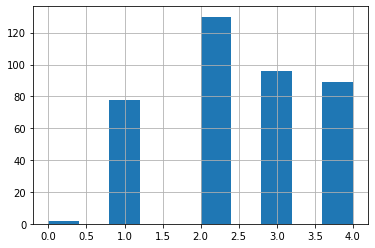

In [26]:
chgNonenuniq(row='fedu')

In [27]:
chgNonenuniq(row='mjob')

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пустые значение приравняем к значению 'other'

In [28]:
stud.mjob = stud.mjob.apply(lambda x: 'other' if pd.isnull(x) else x)

In [29]:
chgNonenuniq(row='fjob')

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пустые значение приравняем к значению 'other'

In [30]:
stud.fjob = stud.fjob.apply(lambda x: 'other' if pd.isnull(x) else x)

In [31]:
chgNonenuniq(row='reason')

,reason
course,137
home,104
reputation,103
other,34


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пустые значение приравняем к значению 'other'

In [32]:
stud.reason = stud.reason.apply(lambda x: 'other' if pd.isnull(x) else x)

In [33]:
chgNonenuniq(row='guardian')

,guardian
mother,250
father,86
other,28


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

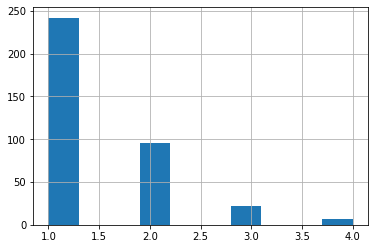

In [34]:
chgNonenuniq(row='traveltime')
stud['traveltime'].describe()

Заменим пустые значения на медиану

In [35]:
stud.traveltime = stud.traveltime.apply(lambda x: stud.traveltime.median() if pd.isnull(x) else x)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


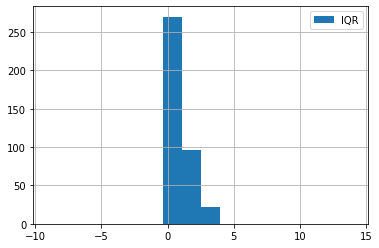

In [36]:
outliers(row='traveltime')

In [37]:
stud.traveltime.sort_values()

394    1.0
337    1.0
196    1.0
195    1.0
338    1.0
      ... 
327    4.0
375    4.0
108    4.0
61     4.0
164    4.0
Name: traveltime, Length: 395, dtype: float64

Мы видим что значение "4" для данного показетеля является выбросом, но устранять его из основного датасета не будем поскольку данный признак является категориальным и значимым.

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

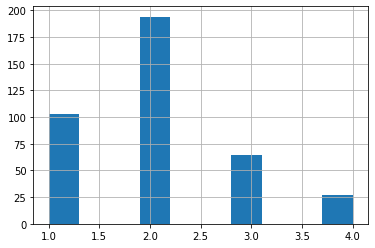

In [38]:
chgNonenuniq(row='studytime')
stud['studytime'].describe()

Заменим пустые значения на медиану.

In [39]:
stud.studytime = stud.studytime.apply(lambda x: stud.studytime.median() if pd.isnull(x) else x)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


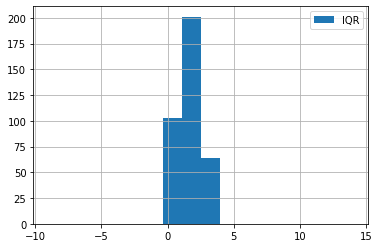

In [40]:
outliers(row='studytime')

Мы видим что значение "4" для данного показетеля является выбросом, но устранять его из основного датасета не будем поскольку данный признак является категориальным и значимым.

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

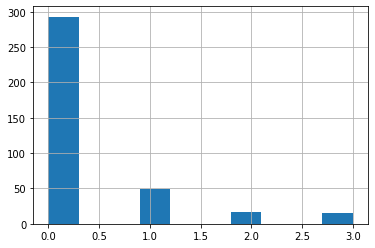

In [41]:
chgNonenuniq(row='failures')
stud['failures'].describe()

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


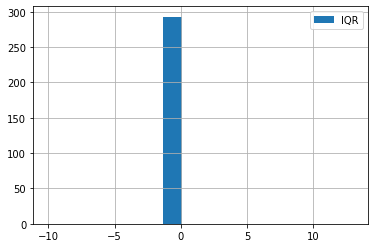

In [42]:
outliers(row='failures')

Данный показатель является не очень точным, поскольку показывает количество внеучебных неудач либо от одного до трех, либо все остальное, включая большее количество неудач и меньшее.
Поскольку последние значения сильно преобладают, то и все остальные значения можно считать выбросом, но это будет не верно для нашего анализа.

Пустые значение приравниваем к 0, как к наиболее часто встречающемуся значению.

In [43]:
stud.failures = stud.failures.apply(lambda x: 0 if pd.isnull(x) else x)

In [44]:
chgNonenuniq(row='schoolsup')

,schoolsup
no,335
yes,51


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Отсуствие упоминания о доп. образовании прировняем к отсутвию доп. образования.

In [45]:
stud.schoolsup = stud.schoolsup.apply(lambda x: "no" if pd.isnull(x) else x)

In [46]:
chgNonenuniq(row='famsup')

,famsup
yes,219
no,137


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


С этой категорией поступаем так же

In [47]:
stud.famsup = stud.famsup.apply(lambda x: "no" if pd.isnull(x) else x)

In [48]:
chgNonenuniq(row='paid')

,paid
no,200
yes,155


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [49]:
stud.paid = stud.paid.apply(lambda x: "no" if pd.isnull(x) else x)

In [50]:
chgNonenuniq(row='activities')

,activities
yes,195
no,186


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [51]:
stud.activities = stud.activities.apply(lambda x: "noactivities" if pd.isnull(x) else x)

In [52]:
chgNonenuniq(row='nursery')

,nursery
yes,300
no,79


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [53]:
stud.nursery = stud.nursery.apply(lambda x: "nonursery" if pd.isnull(x) else x)

In [54]:
chgNonenuniq(row='higher')

,higher
yes,356
no,19


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [55]:
stud.higher = stud.higher.apply(lambda x: "no" if pd.isnull(x) else x)

In [56]:
chgNonenuniq(row='internet')

,internet
yes,305
no,56


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [57]:
stud.internet = stud.internet.apply(lambda x: "nointernet" if pd.isnull(x) else x)

In [58]:
chgNonenuniq(row='romantic')

,romantic
no,240
yes,124


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [59]:
stud.romantic = stud.romantic.apply(lambda x: "no" if pd.isnull(x) else x)

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

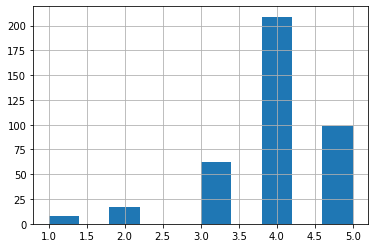

In [64]:
chgNonenuniq(row='famrel')
stud['famrel'].describe()

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


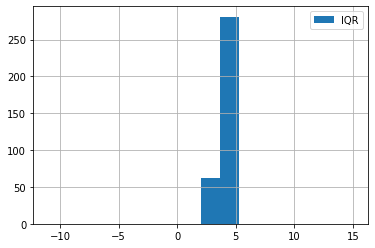

In [61]:
outliers(row='famrel')

Предположим что значение -1 один является ошибкой и поменяем его на 1

In [62]:
stud.loc[(stud['famrel']==-1),'famrel'] = 1

Заменим пустые значения на медиану

In [63]:
stud.famrel = stud.famrel.apply(lambda x: stud.famrel.median() if pd.isnull(x) else x)

Как видно что все значения ниже 2.5, а именно 2 и 1, считаются выбросами, отбросим только 1

In [74]:
a = len(stud)
stud = stud.loc[stud['famrel']>=2]
print(f'{a - len(stud)} - количество устранненых выбросов')

8 - количество устранненых выбросов


,freetime
3.0,150
4.0,111
2.0,60
5.0,38
1.0,17


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  376 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


count    376.000000
mean       3.247340
std        0.990619
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

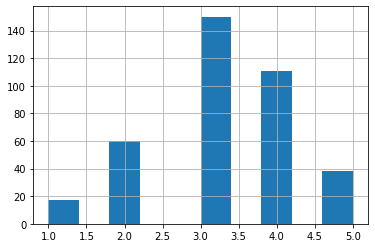

In [76]:
chgNonenuniq(row='freetime')
stud['freetime'].describe()

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


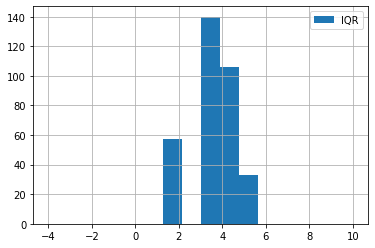

In [106]:
outliers(row='freetime')

In [79]:
stud.freetime = stud.freetime.apply(lambda x: stud.freetime.median() if pd.isnull(x) else x)

Мы видим, что все значения меньше полутора являются выбросом, но по моему мнению количество значений достачное, чтобы их не считать выбросом.

,goout
3.0,125
2.0,97
4.0,84
5.0,51
1.0,22


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   379 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


count    379.000000
mean       3.118734
std        1.112289
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

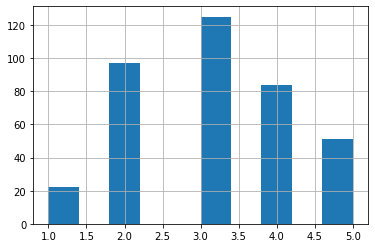

In [77]:
chgNonenuniq(row='goout')
stud['goout'].describe()

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


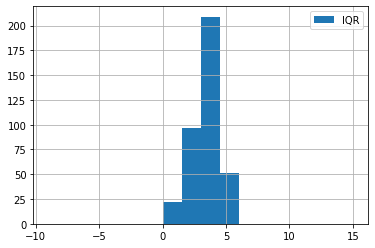

In [78]:
outliers(row='goout')

In [80]:
stud.goout = stud.goout.apply(lambda x: stud.goout.median() if pd.isnull(x) else x)

Для данного показетелем все распределенно равномерно, выбросов -  нет.

,health
5.0,135
3.0,88
4.0,63
2.0,43
1.0,43


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  372 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


count    372.000000
mean       3.548387
std        1.379606
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

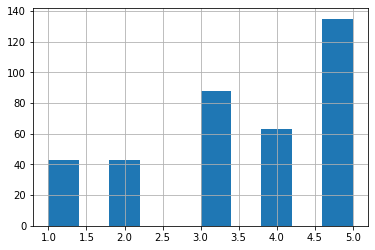

In [81]:
chgNonenuniq(row="health")
stud['health'].describe()

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


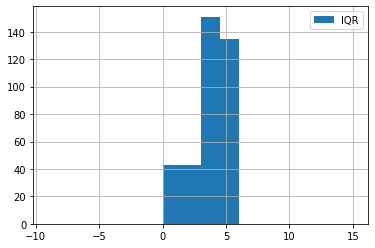

In [82]:
outliers(row='health')

In [83]:
stud.health = stud.health.apply(lambda x: stud.health.median() if pd.isnull(x) else x)

Схожая ситуация с предыдущим показателем, все распределенно равномерно, выбросов -  нет.

,absences
0.0,110
2.0,59
4.0,52
6.0,30
8.0,21
10.0,16
12.0,12
14.0,10
3.0,8
16.0,7


Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  375 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


count    375.00000
mean       7.28800
std       23.70377
min        0.00000
25%        0.00000
50%        4.00000
75%        8.00000
max      385.00000
Name: absences, dtype: float64

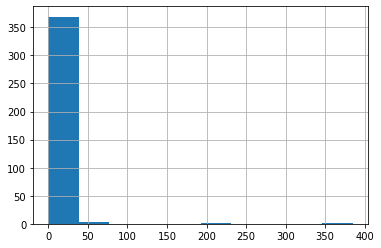

In [85]:
chgNonenuniq(row="absences")
stud['absences'].describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


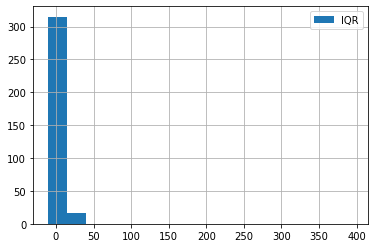

In [115]:
outliers(row='absences')

In [86]:
stud.absences = stud.absences.apply(lambda x: stud.absences.median() if pd.isnull(x) else x)

Отбросим очевидно большие значения

In [88]:
a = len(stud)
stud = stud.loc[stud['absences']<=100]
print(f'{a - len(stud)} - количество устранненых выбросов')

2 - количество устранненых выбросов


Произведена первичная обработка данных
Найдены уникальные значения
Приступим к кореляционному анализу

In [99]:
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,nofamsize,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,nointernet,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,nopstatus,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,no,no,no,no,no,no,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,noactivities,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [105]:
stud_filter=stud.drop(['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health'], axis=1)

In [106]:
stud_filter

,age,absences,score
0,18,6.0,30.0
1,17,4.0,30.0
2,15,10.0,50.0
3,15,2.0,75.0
4,16,4.0,50.0
...,...,...,...
388,18,0.0,40.0
391,17,3.0,80.0
392,21,3.0,35.0
393,18,0.0,50.0


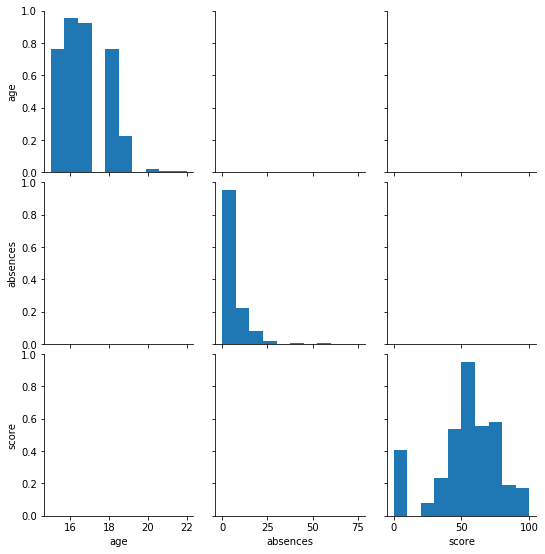

In [107]:
sns.pairplot(stud_filter, kind = 'score')

Используем для наглядности матрицу корреляций:

In [109]:
stud_filter.corr()

,age,absences,score
age,1.000000,0.170734,-0.181720
absences,0.170734,1.000000,0.030862
score,-0.181720,0.030862,1.000000


Все переменные слабоскоррелированные

In [110]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

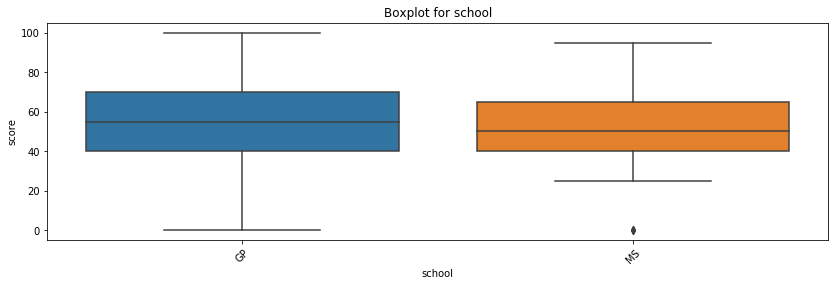

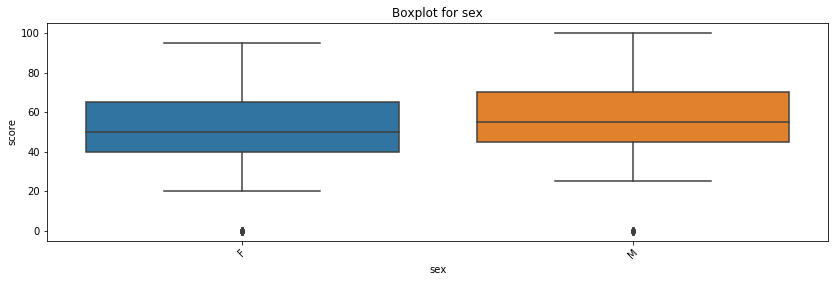

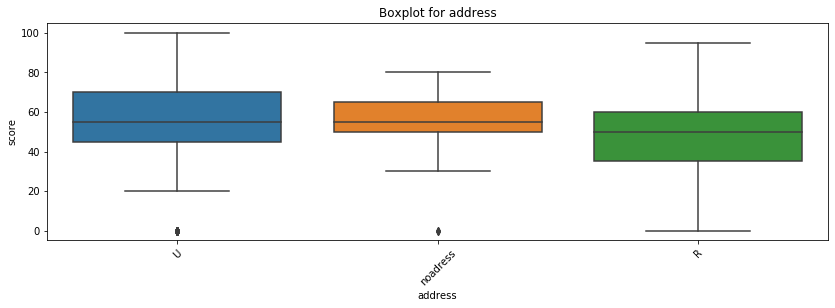

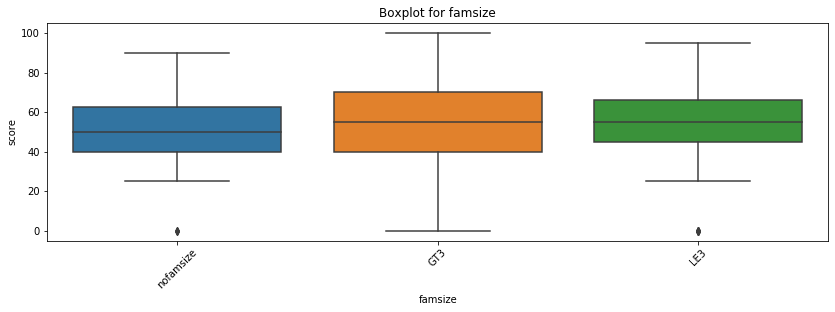

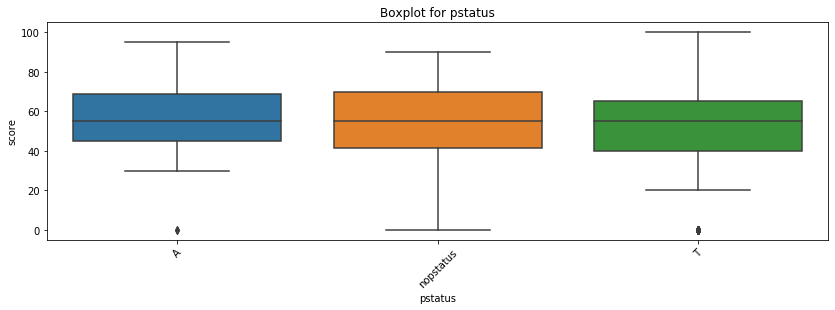

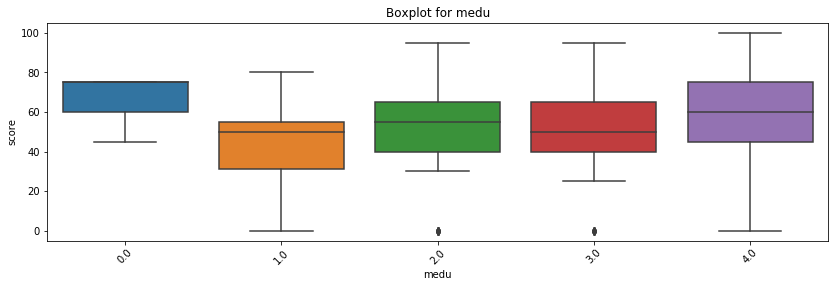

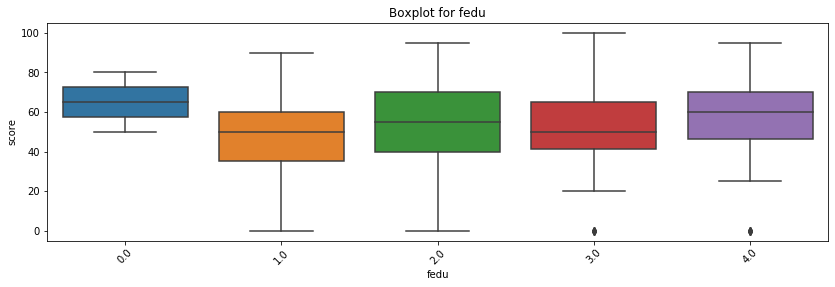

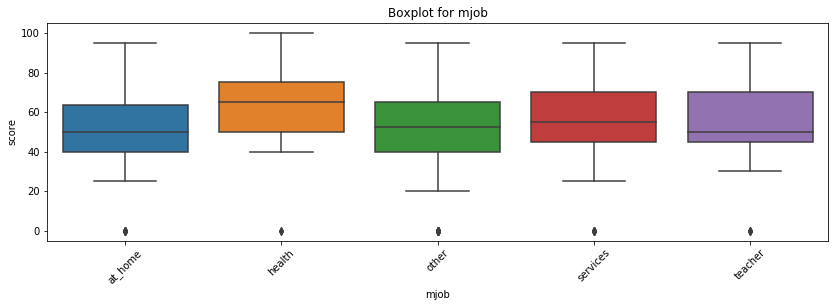

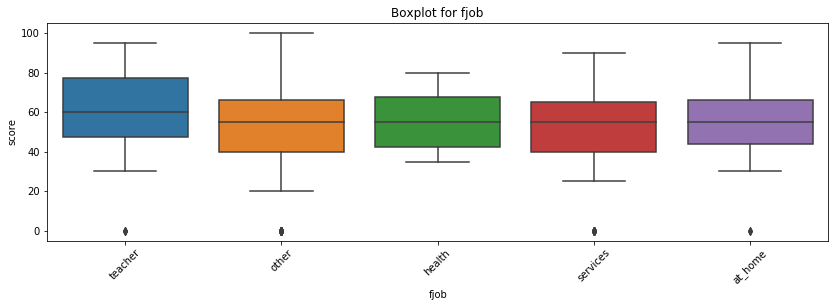

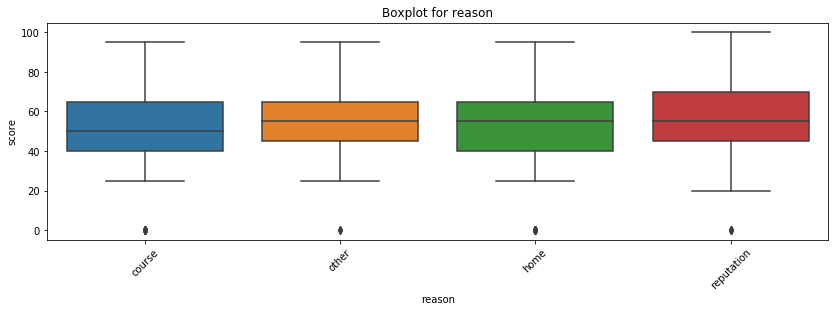

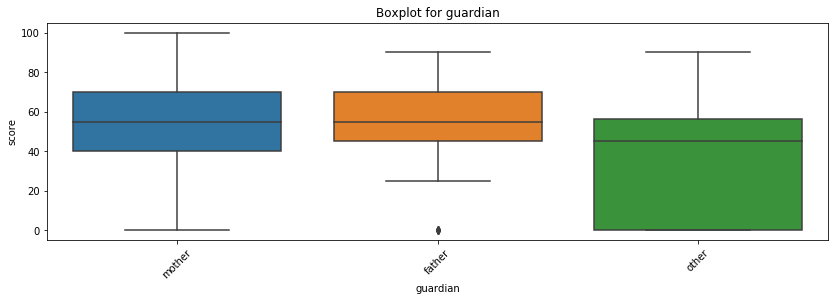

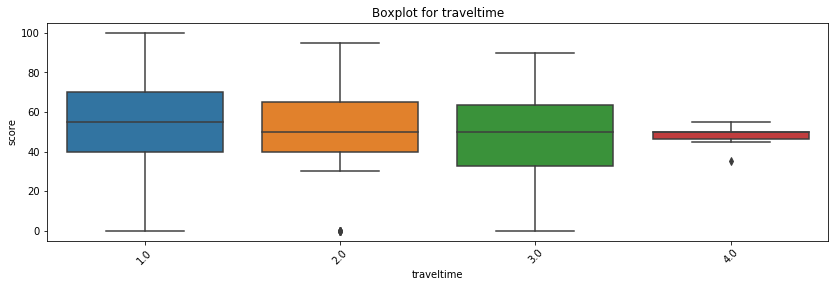

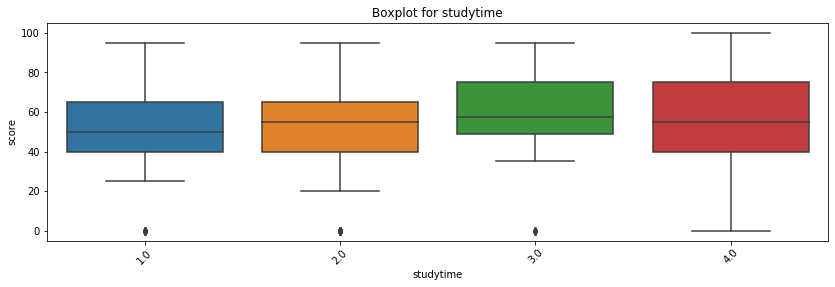

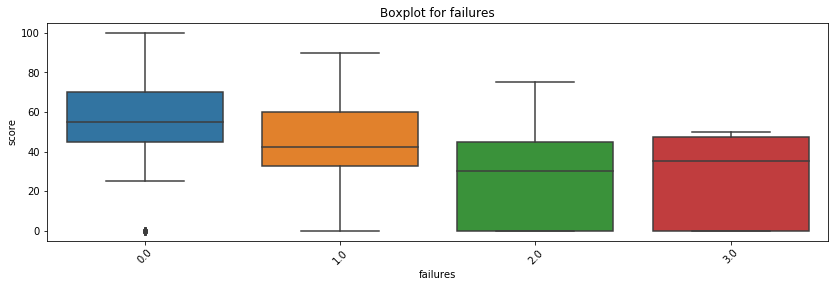

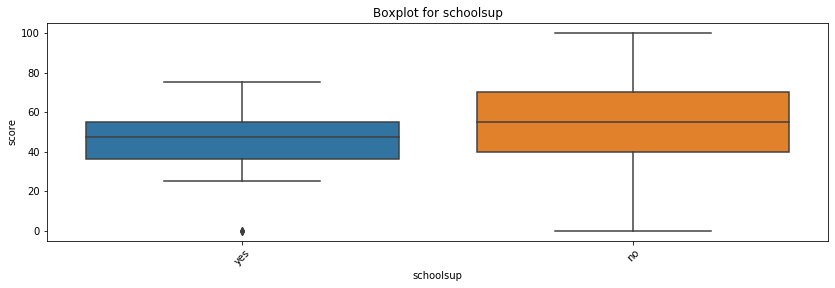

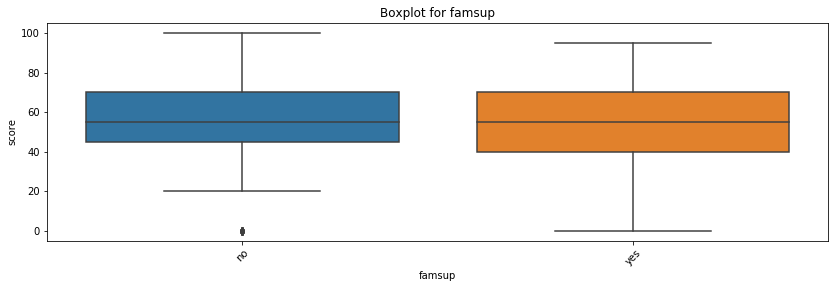

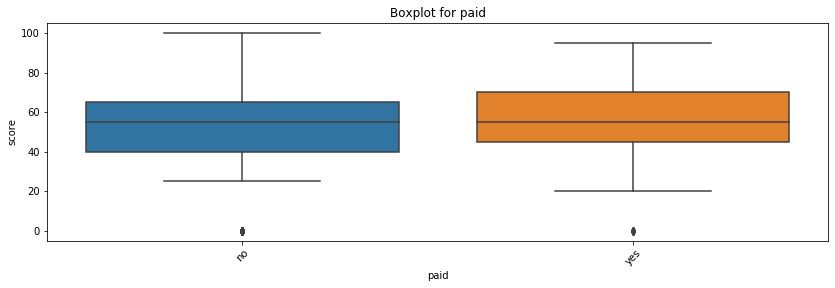

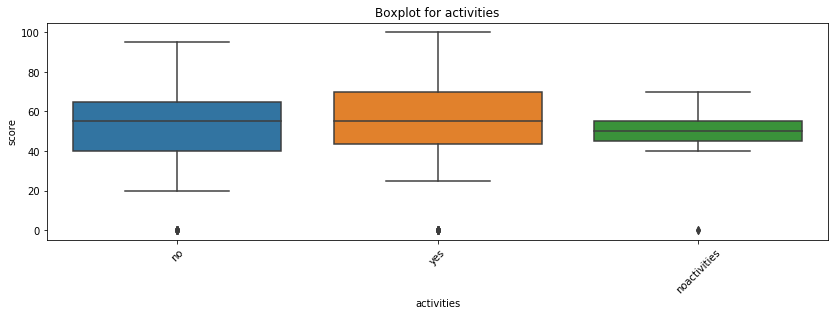

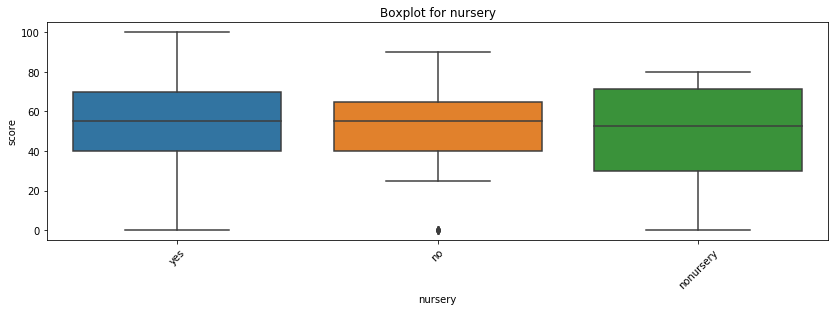

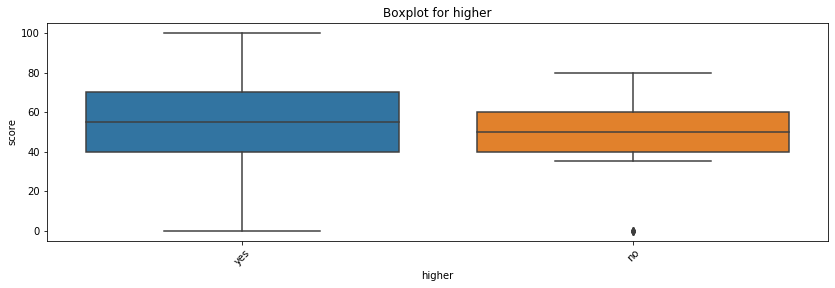

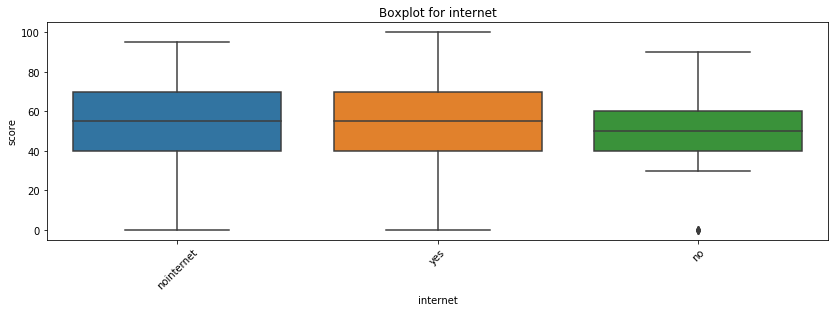

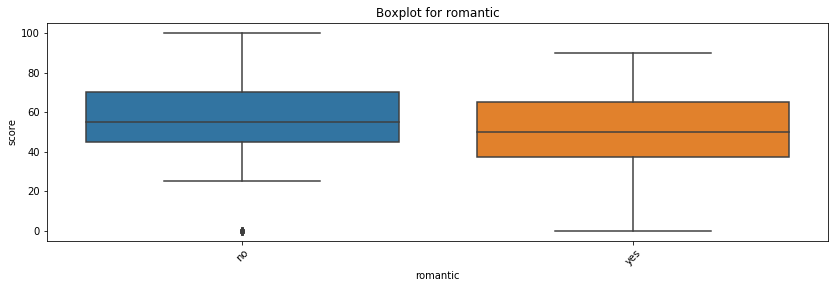

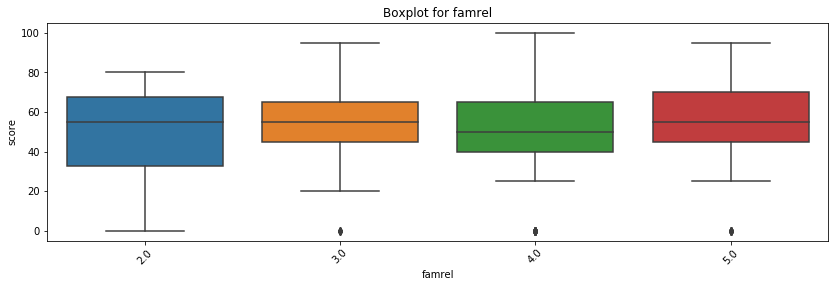

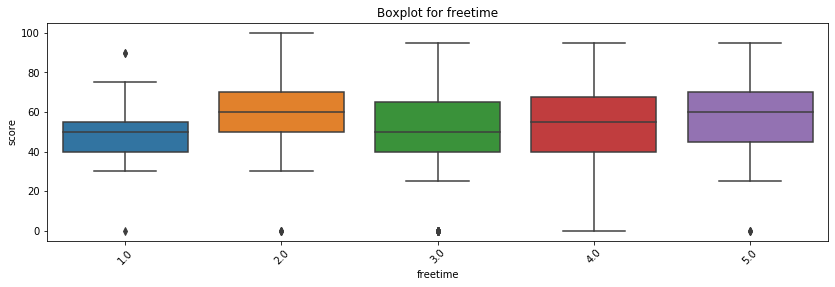

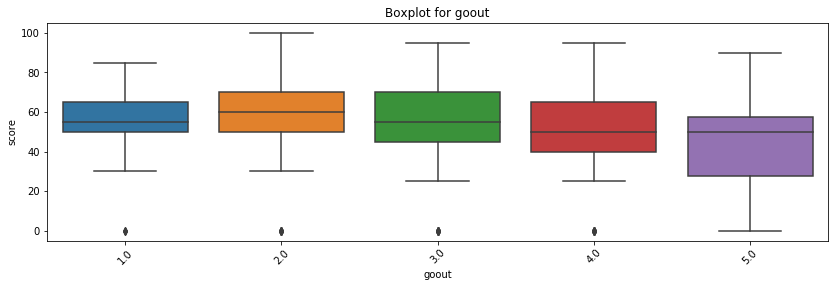

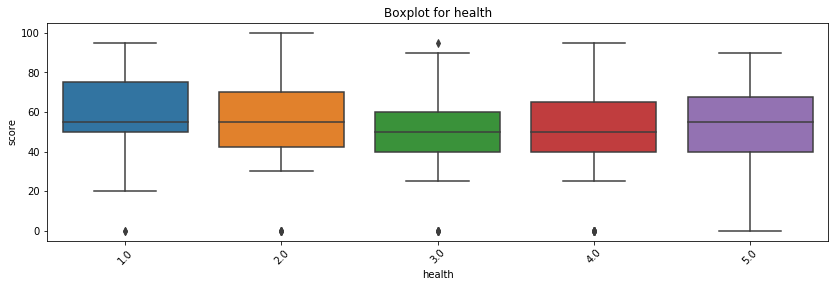

In [112]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']:
    get_boxplot(col)

In [120]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[1], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[0], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по госэкзамену по математике по различным параметрам неразличимы:

In [121]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: sex, medu, mjob, guardian, failures, schoolsup, romantic, goout.

In [123]:
stud_model = stud.loc[:, ['sex', 'medu', 'mjob', 'guardian', 'failures', 'schoolsup', "romantic", 'goout','score']]
stud_model.head()

,sex,medu,mjob,guardian,failures,schoolsup,romantic,goout,score
0,F,4.0,at_home,mother,0.0,yes,no,4.0,30.0
1,F,1.0,at_home,father,0.0,no,no,3.0,30.0
2,F,1.0,at_home,mother,3.0,yes,no,2.0,50.0
3,F,4.0,health,mother,0.0,no,yes,2.0,75.0
4,F,3.0,other,father,0.0,no,no,2.0,50.0


Пройдемся по каждой из этих переменных:
    sex - пол имеет два значения и не имеет выбросов.
    medu - имеет 5 различных уникальных значений в зависимости от образования матери, в данной категории выбросов нет 
    mjob - имеет 5 различных уникальных значений в зависимости от работы матери, в данной категории выбросов нет 
    guardian - имеет 3 различных уникальных значения в зависимости от опекунства, в данной категории выбросов нет 
    failures - Как уже говорилось данный показатель является не очень точным, поскольку показывает количество внеучебных неудач либо от одного до трех,
    либо все остальное, включая большее количество неудач и меньшее.
    schoolsup - имеет 2 различных уникальных значения в зависимости от наличия дополнительной образовательной поддержки
    romantic - имеет 2 различных уникальных значения в зависимости от наличия  романтических отношенияй 
    goout - имеет 5 различных уникальных значений в зависимости  времени проводимого с друзьями

1. Какова была ваша роль в команде?
Делал самостоятельно

2. Какой частью своей работы вы остались особенно довольны?
На самом деле мне кажется, что модель оказалось не совсем верной и требует переработки 

3. Что не получилось сделать так, как хотелось? Над чем ещё стоит поработать?
Не получилось сделать красивую структурированную систему, стоит поработь над графиками и их построением

4. Что интересного и полезного вы узнали в этом модуле?
На мой взгляд, этот модуль условно является подготовкой к работе Data Scientist'a, а именно подоготовительной частью проекта

5. Что является вашим главным результатом при прохождении этого проекта?
Про результат сложно сказать поскольку я не уверен в правильности проекта

6. Какие навыки вы уже можете применить в текущей деятельности?
Пока что никакие, если подразумевается текущая рабочая деятельность, если в плане учебней деятельности,
то почти все навыки из предидущих модулей

7. Планируете ли вы дополнительно изучать материалы по теме проекта?
Возможно